# Diabetes Prediction with Machine Learning 

# 1.Introduction

Aim of the project is developing a mechine learinig model which can predict whether the patient has diabetes, through the relative information of the patient.

## Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. There are 768 observations and 8 independent variables in the dataset. The target variable indicates the test result of the patient. It is 1 when the test result is positive and 0 when the test result is negative.  

## Variables

- Pregnancies: Number of times pregnant
- Glucose: Glucose
- BloodPressure: Blood pressure
- SkinThickness: Triceps skin fold thickness
- Insulin: Insulin
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: The knowledge of whether there is diabetes: 1 or 0



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
import warnings 
warnings.simplefilter(action="ignore")

## 2.Exploratory Data Analysis

In [2]:
# Read dataset
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


At first glance, it is seen that there is a significant relation ship between positive test results (Outcome=1) and Glucose,also number of pregnancies is likely to be related with outcome variable. Relatively higher or lower BMI level also seem to be related with the outcome variable. On the other hand there are zeros in insulin and extereme vaules in diabets pedigree function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset is consisting of 768 rows and 9 columns. All the variables are seem to be numeric variables however, unique values in each variable should be checked in order to determine any categorical variable included into the data set. 

In [5]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
df[num_but_cat].nunique()

Outcome    2
dtype: int64

Outcome variable is the only categorical variable, accurding to the determined treshold level, which is 10.

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There seems to be no missing values in the dataset. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


However variables such as bloodpressure or BMI are logically can not be zero. This means that missing values in the dataset are filled with 0 instead of NaN. If mean and median values are similar, data is symetric. This situation can be observed for Glucose, BloodPressure and BMI. 

If mean is grater than the median value, data is skewed to the right and vice versa. Such situation is significantly observed for Insulin. The skweness of the distribution of the data can better observed with histograms below.

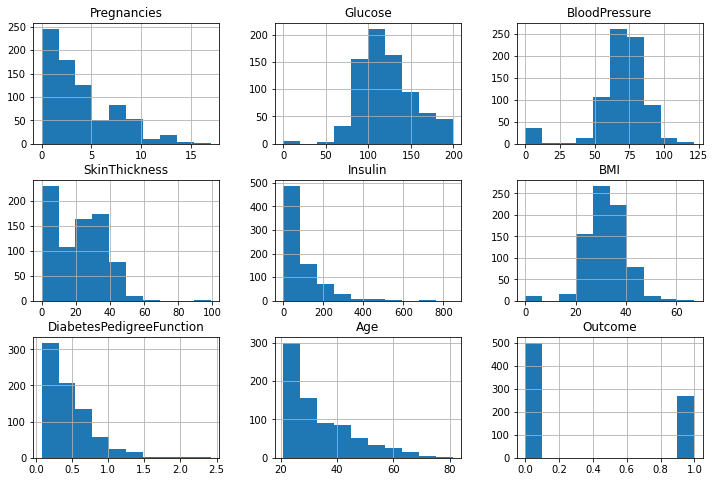

In [8]:
df.hist(figsize=(12,8));

Skeweness might be a signal of possible outlier values. Such outlier values can be observed with boxplot.

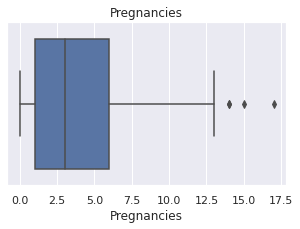

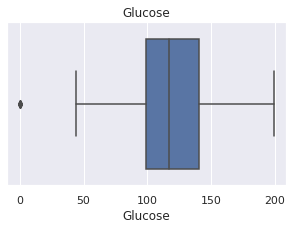

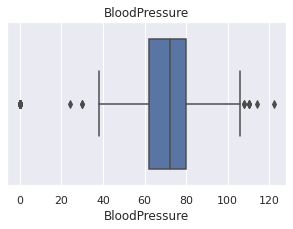

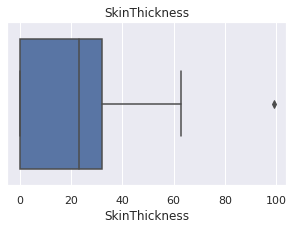

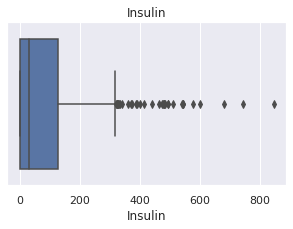

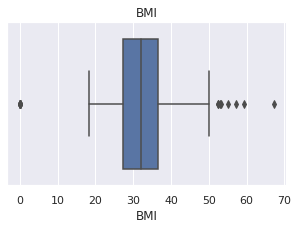

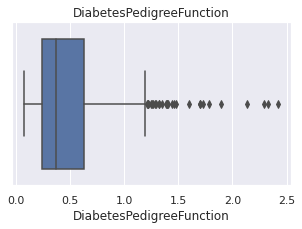

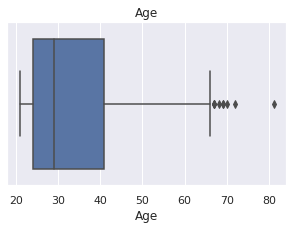

In [9]:
num_cols = [col for col in df.columns if col not in num_but_cat]
for col in num_cols:
    sns.set(rc={'figure.figsize':(5,3)})
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

### 2.1 Target Analysis 

In [10]:
target = df["Outcome"]
for col in num_cols:
    print(df.groupby(target).agg({col: "mean"}), end="\n\n\n")

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




There is a high differnece in average Glucose levels of individuals who have diabetes and who does not have diabetes. Whereas, average level of SkinThickness of positive tested and negative tested individuals appears to be close to each other.

# 3. Data Preprocessing 

## 3.1 Missing Value Treatment 

As mentioned earlier Blood Pressure, BMI, Glucose, Insulin, Skin Thickness can not be zero. Therefore these values are filled with NaNs.

In [11]:
null_cols = ['BloodPressure','BMI','Glucose','Insulin','SkinThickness']
df[null_cols] = df[null_cols].replace(0, np.NaN)

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Right now, actual null values have appeard in the dataset. These values can be filled with median values (https://www.kaggle.com/imdevez/pima-indians-diabetes-eda-prediction-0-941).

In [13]:
df.pivot_table(df, index=["Outcome"], aggfunc = "median")

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,27,30.1,70.0,0.336,107.0,102.5,2,27.0
1,36,34.3,74.5,0.449,140.0,169.5,4,32.0


In [14]:
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

## 3.2 Outlier Treatment 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As it is seen above there are still outlier values in the dataset. This can be fixed with the following functions. Which functions equalize the outlier values with the threshold levels of which variable. 

In [16]:
# Funtion to determine the outlier thresholds for the choosen variable 
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [17]:
# Function to control check outlier values by the predetermined treshold values.
def check_outlier(dataframe, col_name, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [18]:
for col in df.columns:
    if check_outlier(df, col):
        print(col, "True")
    else: print(col, "False")

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction True
Age False
Outcome False


In [19]:
# Function which replaces the outlier values with the threshold values 
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
for col in df.columns:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [21]:
for col in df.columns:
    if check_outlier(df, col):
        print(col, "True")
    else: print(col, "False")

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


# 3.Feature Engineering

### Categorizing BMI

BMI for adults can be classified as follows:

- Below 18.5      Underweight
- 18.5 – 24.9     Healthy Weight
- 25.0 – 29.9     Overweight
- 30.0 and Above  Obesity

Source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

In [22]:
df["NEW_BMI"] = pd.cut(x=df["BMI"], bins=[0, 18.5, 24.9, 29.9, 70], labels = ["Underweight", "Healty_Weight", "Overweight", "Obesity"])

### Categorizing Glucose 
Definition of the variable Glucose is Glucose is that plasma glucose concentration a 2 hours in an oral glucose tolerance test. For 2 hour GGT the glucose level;

- below 140 mg/dL is normal,
- 140 mg/dL - 200 mg/dL indicates "impaired glucose tolerance"
- 200 mg/dL and above confirm a diagnosis of diabetes

Source: https://en.wikipedia.org/wiki/Glucose_tolerance_test

In [23]:
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 250], labels = ["Normal", "Imp_Glucose_Tolerance", "Confirmed_Diabetes"])

### Pregnancy and Diabetes 

Gestational diabetes occurs between 1 in 20 and 1 in 50 pregnancies. Gestational diabetes mostly goes after the pregnancy but there is a risk of recurrence in future pregnancy. Additonally, women who have had GDM have higher chance to get diabetes in the future. Therefore the variable Pregnancies should be weighted.(https://patient.info/pregnancy/pregnancy-complications/diabetes-and-pregnancy) And women with 4 or more pregnancieas are also in potential risk group. (https://pubmed.ncbi.nlm.nih.gov/31453963/)  

In [24]:
df["NEW_PREGNANCIES"]=df["Pregnancies"].apply(lambda x: x*2 if x<=3 else x*4)

## 3.1 Encoding

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_BMI,NEW_GLUCOSE,NEW_PREGNANCIES
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity,Imp_Glucose_Tolerance,24
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healty_Weight,Imp_Glucose_Tolerance,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,2
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1,Obesity,Normal,0


In [26]:
for col in df.columns:
    print(col, df[col].nunique())

Pregnancies 17
Glucose 135
BloodPressure 47
SkinThickness 30
Insulin 142
BMI 247
DiabetesPedigreeFunction 490
Age 52
Outcome 2
NEW_BMI 4
NEW_GLUCOSE 2
NEW_PREGNANCIES 17


In [27]:
# Picking up categorical variables
cat_cols = [col for col in df.columns if len(df[col].unique()) < 5 and col != "Outcome"]
cat_cols

['NEW_BMI', 'NEW_GLUCOSE']

In [28]:
# Function for encoding categorical variables 
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [29]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pregnancies                        768 non-null    int64  
 1   Glucose                            768 non-null    float64
 2   BloodPressure                      768 non-null    float64
 3   SkinThickness                      768 non-null    float64
 4   Insulin                            768 non-null    float64
 5   BMI                                768 non-null    float64
 6   DiabetesPedigreeFunction           768 non-null    float64
 7   Age                                768 non-null    int64  
 8   Outcome                            768 non-null    int64  
 9   NEW_PREGNANCIES                    768 non-null    int64  
 10  NEW_BMI_Healty_Weight              768 non-null    uint8  
 11  NEW_BMI_Overweight                 768 non-null    uint8  

## 3.2 Standardizing

In [31]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"] # Selecting numerical columns

# Selecting numerical but categorical variables and eliminating target variable 
num_but_cat = [col for col in df.columns if df[col].nunique() < 5 
               and df[col].dtypes != "O"]

num_cols2 = [col for col in num_cols if col not in num_but_cat] 

for col in num_cols2:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

# 4.Modelling

In [32]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=123)

In [34]:

classifiers = [('LR', LogisticRegression()),
               ('KNN', KNeighborsClassifier()),
               ("SVC", SVC()),
               ("CART", DecisionTreeClassifier()),
               ("RF", RandomForestClassifier()),
               ('Adaboost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ('XGBoost', XGBClassifier(verbosity=0, silent=True)),
               ('LightGBM', LGBMClassifier()),
               ('CatBoost', CatBoostClassifier(verbose=False))]

In [35]:
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=10, scoring=["roc_auc"])
    print(f"AUC: {round(cv_results['test_roc_auc'].mean(),4)} ({name}) ")

AUC: 0.8742 (LR) 
AUC: 0.8905 (KNN) 
AUC: 0.9096 (SVC) 
AUC: 0.829 (CART) 
AUC: 0.9412 (RF) 
AUC: 0.9383 (Adaboost) 
AUC: 0.9585 (GBM) 
AUC: 0.9505 (XGBoost) 
AUC: 0.9533 (LightGBM) 
AUC: 0.9536 (CatBoost) 


AUC score for the ROC curve is highest in the GBM with 0.9582 and followed by CatBoost, LightGBM and XGBoost. Therefore the analyse preceeds with model tunning for those models.

## 4.1 Model Tunning

In [36]:
# Assigning initial parameters 
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

catb_params = {'iterations': [200,500],
               'learning_rate': [0.01,0.05, 0.1],
               'depth': [3,5,8]}

lgbm_params = {'n_estimators': [100, 500, 1000, 2000],
               'subsample': [0.6, 0.8, 1.0],
               'max_depth': [3, 4, 5,6],
               'learning_rate': [0.1,0.01,0.02,0.05],
               "min_child_samples": [5,10,20]} #instead of min_samples_split
        
xgb_params = {"n_estimators": [100, 500, 1000, 2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth": [3, 4, 5,6],
              'learning_rate': [0.1,0.01,0.02,0.05],
              "min_samples_split": [2,5,10]}

In [37]:
classifiers = [('GBM', GradientBoostingClassifier(), gbm_params),
               ('XGBoost', XGBClassifier(verbosity=0, silent=True), xgb_params),
               ('LightGBM', LGBMClassifier(), lgbm_params),
               ('CatBoost', CatBoostClassifier(verbose=False), catb_params)]

best_models = {}

for name, classifier, params in classifiers:
    print(f"########## {name} ##########")
    cv_results = cross_validate(classifier, X, y, cv=10, scoring=["roc_auc"])
    print(f"AUC (Before): {round(cv_results['test_roc_auc'].mean(),4)}")


    gs_best = GridSearchCV(classifier, params, cv=10, n_jobs=-1, verbose=False).fit(X, y)
    final_model = classifier.set_params(**gs_best.best_params_)

    cv_results = cross_validate(final_model, X, y, cv=10, scoring=["roc_auc"])
    print(f"AUC (After): {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

########## GBM ##########
AUC (Before): 0.9581
AUC (After): 0.9558
GBM best params: {'learning_rate': 0.001, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1000}

########## XGBoost ##########
AUC (Before): 0.9505
AUC (After): 0.9571
XGBoost best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}

########## LightGBM ##########
AUC (Before): 0.9533


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC (After): 0.9542
LightGBM best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 1000, 'subsample': 0.6}

########## CatBoost ##########
AUC (Before): 0.9536
AUC (After): 0.9541
CatBoost best params: {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}



### 3.2 Stacking and Ensambling Models

Best 4 models based on their AUC score is combined to bulit a robust and optimal model with voting classifier. Additionally, k-fold cross valdition is used to estimate the prediction power of the ensambled model. 

In [38]:
voting_clf = VotingClassifier(
    estimators=[('GBM', best_models["GBM"]),
                ('CatBoost', best_models["CatBoost"]),
                ('XGBoost', best_models["XGBoost"]),
                ('LightGBM', best_models["LightGBM"])],
    voting='soft')

voting_clf.fit(X, y)

kfold = KFold(n_splits=10, random_state=6789)
cv_results = cross_validate(voting_clf, X, y, cv=kfold, scoring=["accuracy", "f1", "roc_auc"])
print(f"AUC (After): {round(cv_results['test_roc_auc'].mean(), 4)}")

AUC (After): 0.9561
